# Climate Change - Exploratory Data Analysis

> In this notebook, we are going to **explore, clean and manupilate datasets** that will be used to **create visualizations** using open dataset on **climate change**.

An attempt will be made to answer the following questions:
1. What is climate change and its consequences?
2. Who is responsible for the CO2 emissions?
3. How can we reduce CO2 emissions?

## Load Libraries

In [37]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

import pathlib
import os
import datetime
from pprint import pprint

# This module provides a progress bar when dealing with loops.
try:
    from tqdm import tqdm
except ModuleNotFoundError:
    print("Installing tqdm library.")
    !pip install tqdm --quiet
    from tqdm import tqdm

## What is climate change and its consequences?
* How humans are creating an imbalance Earth’s ecosystems, causing: 
    - A rise in global temperatures 
    - Melting of glaciers
    - Rise in sea levels 
    - Rise in natural disasters 
* Talk about the deaths due to natural disasters over the past. 
* Mention the rise in sea levels and reduction in the size of the glaciers. 

* What is causing the change in global temperatures? 
    - Rise in Greenhouse gases that trap the heat coming from the sun into the earth’s atmosphere. 
    - CO2 emissions being the primary driver of climate change. 
    - Talk about how human activities is responsible for the rise in global temperatures.

### Loading Data
The following datasets will be used:
1. Global Temperatures (`Berkley Land-Ocean Temperature Anomaly.csv`)
2. Glaciar Data

In [2]:
# Defining the directory that contains all datasets
evidence_data_dir = pathlib.Path("../data/Evidence datasets")

# Check if directory exists
if not evidence_data_dir.exists():
    raise FileNotFoundError(f"No data directory named {evidence_data_dir} found.")

# Defining datasets
datasets = {
    "Temperature Anomaly": evidence_data_dir / "temperature-anomaly.csv",
    "Glaciers": evidence_data_dir / "glaciers-dataset.csv",
    "Antartica Mass": evidence_data_dir / "antartica-mass-dataset.csv",
    "Sea levels": evidence_data_dir / "sea-levels-dataset.csv",
    "Natural Disasters": evidence_data_dir / "natural-disasters-emdat-dataset.xlsx",
    "CO2 concentrations": evidence_data_dir / "global-co2-concentrations.csv",
    "Global Temp Forces": evidence_data_dir / "Forces for rise in temps.csv"
}

# Check if all the datasets exist
for dataset_name, path in datasets.items():
    if not path.exists():
        raise FileNotFoundError(f"Dataset {dataset_name} was not found.")
    else:
        print(f"{dataset_name} Dataset Found.")

Temperature Anomaly Dataset Found.
Glaciers Dataset Found.
Antartica Mass Dataset Found.
Sea levels Dataset Found.
Natural Disasters Dataset Found.
CO2 concentrations Dataset Found.
Global Temp Forces Dataset Found.


In [115]:
# Create dataframes
dataset_dfs = {}

for dataset_name, path in datasets.items():
    if path.exists():
        if path.suffix == '.csv':
            dataset_dfs.update({dataset_name: pd.read_csv(path)})
            print(f"{dataset_name} Dataset Loaded.")
        elif path.suffix == '.xlsx':
            dataset_dfs.update({dataset_name: pd.read_excel(path)})
            print(f"{dataset_name} Dataset Loaded.")

    else:
        raise FileNotFoundError(f"Dataset {dataset_name} was not found.")

Temperature Anomaly Dataset Loaded.
Glaciers Dataset Loaded.
Antartica Mass Dataset Loaded.
Sea levels Dataset Loaded.
Natural Disasters Dataset Loaded.
CO2 concentrations Dataset Loaded.
Global Temp Forces Dataset Loaded.


#### Visualizing Anomalies in Global Temperatures
> Observe how there is an increase of about 1 deg. Celcious over the years.

In [116]:
global_temp_df = dataset_dfs["Temperature Anomaly"].copy()
global_temp_df.head()

,Entity,Code,Year,Median temperature anomaly from 1961-1990 average,Upper bound (95% CI),Lower bound (95% CI)
0,Global,NaN,1850,-0.373,-0.339,-0.425
1,Global,NaN,1851,-0.218,-0.184,-0.274
2,Global,NaN,1852,-0.228,-0.196,-0.280
3,Global,NaN,1853,-0.269,-0.239,-0.321
4,Global,NaN,1854,-0.248,-0.218,-0.301


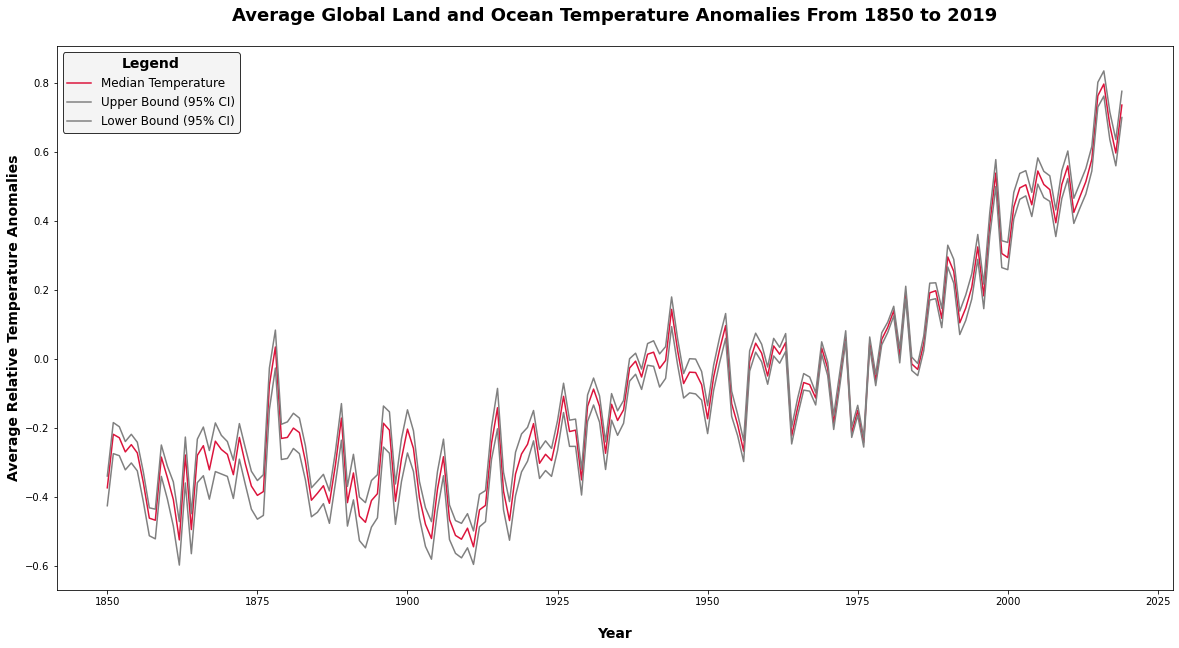

In [117]:
fig, ax = plt.subplots(figsize=(20,10))

data = global_temp_df[global_temp_df["Entity"] == "Global"].drop(["Entity", "Code"], axis=1).set_index("Year")

avg = data["Median temperature anomaly from 1961-1990 average"]
upper = data["Upper bound (95% CI)"]
lower = data["Lower bound (95% CI)"]

ax.plot(avg, color="#DC143C", label="Median Temperature")
ax.plot(upper, color="grey", label="Upper Bound (95% CI)")
ax.plot(lower, color="grey", label="Lower Bound (95% CI)")

ax.set_ylabel("Average Relative Temperature Anomalies",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_xlabel("Year",
              fontdict={"size": 14,
                        "weight": "bold"},
              labelpad=20)

ax.set_title("Average Global Land and Ocean Temperature Anomalies From 1850 to 2019",
             fontdict={"size": 18,
                        "weight": "bold"},
             pad=25);

leg = ax.legend(prop={'size': 12}, frameon=True)
leg.set_title('Legend', prop={'size': 14, 'weight': 'bold'})
leg.get_frame().set_color('#F2F2F2')
leg.get_frame().set_edgecolor('#000000')

In [118]:
global_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Entity                                             680 non-null    object 
 1   Code                                               0 non-null      float64
 2   Year                                               680 non-null    int64  
 3   Median temperature anomaly from 1961-1990 average  680 non-null    float64
 4   Upper bound (95% CI)                               680 non-null    float64
 5   Lower bound (95% CI)                               680 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 32.0+ KB


In [119]:
global_temp_df["Entity"].unique()

array(['Global', 'Northern Hemisphere', 'Southern Hemisphere', 'Tropics'],
      dtype=object)

It can be seen that the `Code` column is of not much use. Hence, it will be dropped and the data will be saved.
Additionally, only the `global` data will be used, hence, all the other rows will be dropped.

In [120]:
process_evidence_data_dir = evidence_data_dir / "Processed datasets"

global_temp_df.drop("Code", axis=1)[global_temp_df["Entity"]=="Global"].to_csv(
    os.path.join(process_evidence_data_dir, "Global Temperature Anomalies.csv"),
    index=False
)

#### Visualizing the Change in Glaciers
The following text was present at the top of the CSV file.
```
"Figure 1. Average Cumulative Mass Balance of ""Reference"" Glaciers Worldwide, 1945-2015",,
Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,,
"Data source: WGMS, 2016",,
Web update: August 2016,,
Units: m of water equivalent; count,,
,,
```

In [123]:
# Create copy of the dataframe
glaciers_df = dataset_dfs["Glaciers"].copy()
glaciers_df

,Year,Mean cumulative mass balance,Number of observations
0,1945,0.000,NaN
1,1946,-0.540,1.0
2,1947,-2.420,1.0
3,1948,-2.710,1.0
4,1949,-3.140,4.0
...,...,...,...
66,2011,-25.620,40.0
67,2012,-26.284,39.0
68,2013,-27.142,35.0
69,2014,-27.940,32.0


In [131]:
# Plot the data
fig = px.area(glaciers_df, x="Year", y=["Mean cumulative mass balance"],
              color_discrete_sequence=["#C9DFE0", "#F9DFE0"])

fig.update_yaxes(
    title=dict(
        text="Mean Cumulative Glacier Mass Balance",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_xaxes(
    title_font_family="Arial",
    title=dict(
        text="Year",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_layout(
    title=dict(
        text="Average Change in Glaciers From 1945 to 2015",
        font=dict(
            family="Arial",
            size=24
        )
    ),
    plot_bgcolor="white",
    hovermode="x unified"
)

fig.show()

In [125]:
glaciers_df["Change in mass balance"] = glaciers_df["Mean cumulative mass balance"].diff()
glaciers_df["Decrease in mass balance"] = -glaciers_df["Change in mass balance"]
glaciers_df.head()

,Year,Mean cumulative mass balance,Number of observations,Change in mass balance,Decrease in mass balance
0,1945,0.00,NaN,NaN,NaN
1,1946,-0.54,1.0,-0.54,0.54
2,1947,-2.42,1.0,-1.88,1.88
3,1948,-2.71,1.0,-0.29,0.29
4,1949,-3.14,4.0,-0.43,0.43


The following are the years with the highest change in mass balance.

In [126]:
fig = px.treemap(glaciers_df, path=["Year"], values="Change in mass balance",
                 color="Year", color_continuous_scale="RdBu")


fig.update_layout(
    title=dict(
        text="Higehst Rise in Glaciers Mass Balance between 1945 to 2015",
        font=dict(
            family="Arial",
            size=24
        )
    )
)

fig.show()

In [127]:
fig = px.treemap(glaciers_df, path=["Year"], values="Decrease in mass balance",
                 color="Year", color_continuous_scale="RdBu")


fig.update_layout(
    title=dict(
        text="Largest Decrease in Glaciers Mass Balance between 1945 to 2015",
        font=dict(
            family="Arial",
            size=24
        )
    )
)

fig.show()

As you can see that large decreases in glacier mass balance have happened in the recent years. 
> **13 out of 18 highest decreases in glacier mass balance has occurred in the last 20 years (since 2000).**

#### Processing the Glacier Dataset
Two things need to be considered for this dataset:
1. The changes in glacier mass columns (`Change in mass balance` and `Decrease in mass balance`) would be beneficial in creating visualizations. Hence, they should be part of the `CSV` file.
2. The number of observations do not provide much information on the general trend in the data. It can be used to determine uncertainty in the Glaciers' `Mean cumulative mass balance`. However, it can be see that the number of observations increase in number as we go from 1945 to 2015, indicating consistently reliable values. As the focus of the dataset is on the recent changes in mass balance, `Number of observations` tells us results are reliable and do not provide any further insights into the dataset.

In [132]:
glaciers_df.head()

,Year,Mean cumulative mass balance,Number of observations,Change in mass balance,Decrease in mass balance
0,1945,0.00,NaN,NaN,NaN
1,1946,-0.54,1.0,-0.54,0.54
2,1947,-2.42,1.0,-1.88,1.88
3,1948,-2.71,1.0,-0.29,0.29
4,1949,-3.14,4.0,-0.43,0.43


In [133]:
glaciers_df.drop(["Number of observations"], axis=1).to_csv(
    os.path.join(process_evidence_data_dir, "Glaciers Mass Balance.csv"),
    index=False
)

#### Visualizing the Changes in Antartica's Mass

In [134]:
# Create a copy of the dataframe
antartica_df = dataset_dfs["Antartica Mass"].copy()
antartica_df

,Time (year.decimal),Antarctic mass (Gigatonnes),Antarctic mass 1-sigma uncertainty (Gigatonnes)
0,2002.29,0.00,178.90
1,2002.35,19.01,102.47
2,2002.62,-59.36,83.09
3,2002.71,46.55,97.19
4,2002.79,63.31,61.82
...,...,...,...
189,2020.79,-2542.18,33.34
190,2020.87,-2593.06,39.75
191,2020.96,-2751.98,46.72
192,2021.04,-3070.67,54.96


In [135]:
fig = px.area(antartica_df, x="Time (year.decimal)", y=["Antarctic mass (Gigatonnes)",
                                                        "Antarctic mass 1-sigma uncertainty (Gigatonnes)"],
              color_discrete_sequence=["#C9DFE0", "#F9DFE0"])

fig.update_yaxes(
    title=dict(
        text="Antartic Mass (in Gigatonnes)",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_xaxes(
    title_font_family="Arial",
    title=dict(
        text="Year",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_layout(
    title=dict(
        text="Change in Mass of Antartica from 2002 to 2021",
        font=dict(
            family="Arial",
            size=24
        )
    ),
    plot_bgcolor="white"
)

fig.show()

#### Processing the Antartica Dataset
As it can be seen in the above graph that the uncertainty in the data is irrelevant when obeserving the general trend. Hence, the processed dataset will be saved with the `Antarctic mass 1-sigma uncertainty (Gigatonnes)` columns.

In [136]:
antartica_df.drop(["Antarctic mass 1-sigma uncertainty (Gigatonnes)"],axis=1).to_csv(
    os.path.join(process_evidence_data_dir, "Antartica Mass.csv")
)

#### Visualizaing the Change in Sea levels
The following text was present at the top of the CSV file.
```
"Figure 1. Global Average Absolute Sea Level Change, 1880-2015",,,,
Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,,,,
"Data source: CSIRO, 2015; NOAA, 2016"
Web update: August 2016
Units: inches
```

In [137]:
sea_df = dataset_dfs["Sea levels"]
sea_df

,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
131,2011,8.964567,8.661417,9.267717,7.976878
132,2012,9.326772,8.992126,9.661417,8.397377
133,2013,8.980315,8.622047,9.338583,8.484542
134,2014,NaN,NaN,NaN,8.598324


In [138]:
fig = px.line(sea_df, x="Year", y=["CSIRO - Adjusted sea level (inches)",
                                   "CSIRO - Lower error bound (inches)",
                                   "CSIRO - Upper error bound (inches)",
                                   "NOAA - Adjusted sea level (inches)"],
              color_discrete_sequence=["#006994", "grey", "grey", "#699400"])

# ["#006994", "#699400", "#940069"]

fig.update_yaxes(
    title=dict(
        text="Absolute Change in Sea level (in inches)",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_xaxes(
    title_font_family="Arial",
    title=dict(
        text="Year",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_layout(
    title=dict(
        text="Global Absolute Yearly Change in Sea Level from 1880 to 2015",
        font=dict(
            family="Arial",
            size=24
        )
    ),
    hovermode="x unified"
)

fig.show()

#### Processing the Sea Levels Dataset
As it can be seen in the above graph, uncertainties decrease as we move closer to recent data sea-levels and the `NOAA - Adjusted Sea Level (inches)` has data only from 1993, we can remove a total of three columns from the dataframe before using it for visualization in PowerBI.

**Columns not needed**:

1. `CSIRO - Upper error bound (inches)`
2. `CSIRO - Lower error bound (inches)`
3. `NOAA - Adjusted sea level (inches)`

In [139]:
sea_df.head()

,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [140]:
sea_df.drop(["CSIRO - Lower error bound (inches)",
             "CSIRO - Upper error bound (inches)",
             "NOAA - Adjusted sea level (inches)"], axis=1).to_csv(
    os.path.join(process_evidence_data_dir, "Change in Sea Levels.csv"),
    index=False
)

#### Visualizing the Natural Disasters

The following text was present at the top of the Excel Workbook.
```
Source:	EM-DAT, CRED / UCLouvain, Brussels, Belgium			
	www.emdat.be (D. Guha-Sapir)			
Version:	2021-04-08			
File creation:	Thu, 08 Apr 2021 03:40:28 CEST			
Table type:	Custom request			
# of records:	15866			
![image.png](attachment:image.png)
```

In [141]:
# Create a copy of the dataframe
disasters_df = dataset_dfs["Natural Disasters"].copy()
disasters_df

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1902-0012-GTM,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,...,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,3.391845
3,1902-0003-GTM,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
4,1902-0010-GTM,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,2020-0110-ZMB,2020,110,Natural,Hydrological,Flood,NaN,NaN,NaN,Affected,...,26.0,NaN,NaN,700000.0,NaN,700000.0,NaN,NaN,NaN,NaN
15862,2021-0036-ZWE,2021,36,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Eloise',Kill,...,23.0,3.0,NaN,1745.0,NaN,1745.0,NaN,NaN,NaN,NaN
15863,2021-0020-SRB,2021,20,Natural,Hydrological,Flood,NaN,NaN,NaN,Affected,...,12.0,NaN,NaN,22.0,NaN,22.0,NaN,NaN,NaN,NaN
15864,2020-0131-TLS,2020,131,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affected,...,13.0,3.0,7.0,9124.0,NaN,9131.0,NaN,NaN,20000.0,NaN


In [142]:
disasters_df.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,15866.000000,15866.000000,6.770000e+02,4.904000e+03,15866.000000,15481.000000,12263.000000,15866.000000,15158.000000,12332.000000,1.126100e+04,3.824000e+03,9.019000e+03,2.410000e+03,1.139300e+04,3.100000e+01,1.093000e+03,5.172000e+03,15404.000000
mean,1996.380058,713.628766,1.254136e+05,4.770203e+04,1996.393735,6.454363,15.230042,1996.451279,6.581805,15.757947,2.880442e+03,2.645461e+03,8.950619e+05,7.379998e+04,7.250537e+05,2.392251e+06,7.953212e+05,7.182057e+05,63.026606
std,20.076316,1929.782030,2.997875e+06,3.107145e+05,20.073005,3.410862,8.955407,20.060465,3.369937,8.862873,6.906669e+04,3.470192e+04,8.666542e+06,5.251277e+05,7.792127e+06,5.229397e+06,3.058743e+06,4.732457e+06,26.724447
min,1900.000000,1.000000,1.000000e+00,-5.700000e+01,1900.000000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,8.400000e+01,3.400000e+01,2.000000e+00,3.261389
25%,1988.000000,92.000000,1.750000e+02,7.000000e+00,1988.000000,4.000000,7.000000,1988.000000,4.000000,8.000000,6.000000e+00,1.400000e+01,1.253500e+03,5.907500e+02,6.600000e+02,1.200000e+04,5.000000e+04,8.000000e+03,46.256557
50%,2001.000000,267.500000,7.210000e+02,1.545000e+02,2001.000000,7.000000,15.000000,2001.000000,7.000000,16.000000,2.000000e+01,5.100000e+01,1.000000e+04,3.000000e+03,6.000000e+03,1.940000e+05,1.700000e+05,6.000000e+04,69.259340
75%,2010.000000,486.000000,3.511000e+03,1.159250e+04,2010.000000,9.000000,23.000000,2010.000000,9.000000,23.000000,6.400000e+01,2.000000e+02,9.410550e+04,1.770700e+04,5.851100e+04,1.520376e+06,5.000000e+05,3.150000e+05,84.215229
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,3.700000e+06,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,2.500000e+07,6.000000e+07,2.100000e+08,100.000000


In [143]:
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15866 entries, 0 to 15865
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           15866 non-null  object 
 1   Year                             15866 non-null  int64  
 2   Seq                              15866 non-null  int64  
 3   Disaster Group                   15866 non-null  object 
 4   Disaster Subgroup                15866 non-null  object 
 5   Disaster Type                    15866 non-null  object 
 6   Disaster Subtype                 12862 non-null  object 
 7   Disaster Subsubtype              1047 non-null   object 
 8   Event Name                       3806 non-null   object 
 9   Entry Criteria                   15531 non-null  object 
 10  Country                          15866 non-null  object 
 11  ISO                              15866 non-null  object 
 12  Region            

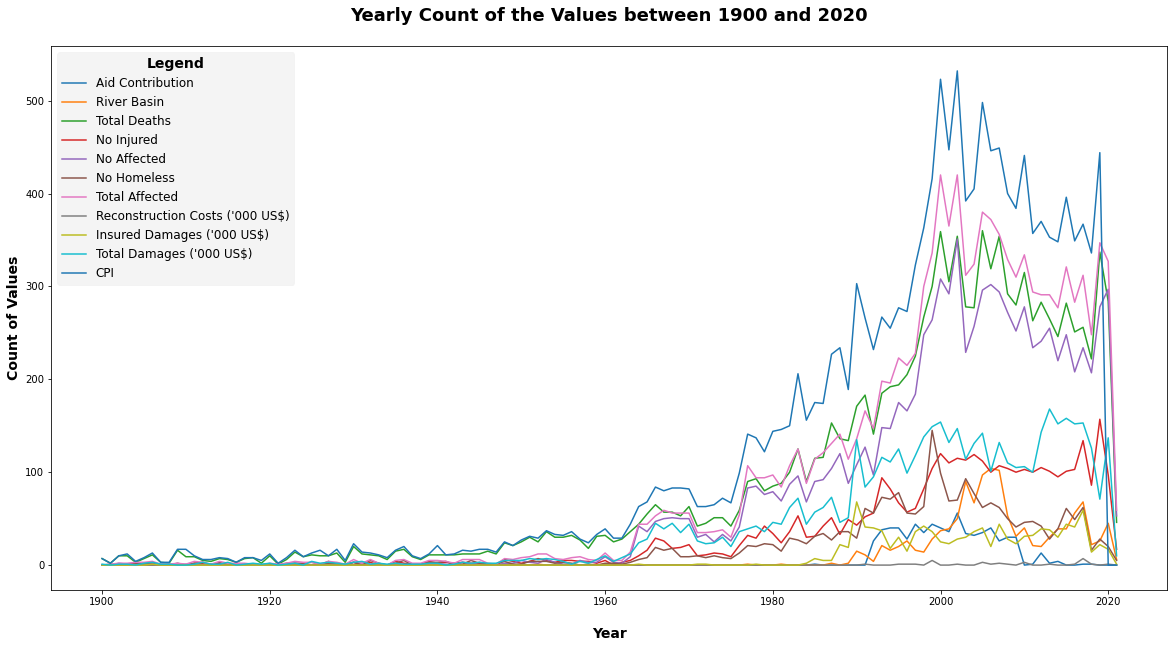

In [30]:
drop_cols = ["Dis No", "Seq", "Disaster Group", "Disaster Subgroup",
             "Disaster Type", "Disaster Subtype", "Disaster Subsubtype",
             "Event Name", "Entry Criteria", "Country", "ISO", "Region",
             "Continent", "Location", "Origin", "Associated Dis",
             "Associated Dis2", "OFDA Response", "Appeal", "Declaration",
             "Dis Mag Value", "Dis Mag Scale", "Latitude", "Longitude",
             "Local Time", "Start Year", "Start Month", "Start Day",
             "End Year", "End Month", "End Day"
            ]
fig, ax = plt.subplots(figsize=(20,10))

disasters_df.drop(drop_cols, axis=1).groupby("Year").count().plot(ax=ax)

ax.set_ylabel("Count of Values",
              fontdict={"size": 14,
                        "weight": "bold"})

ax.set_xlabel("Year",
              fontdict={"size": 14,
                        "weight": "bold"},
              labelpad=20)

ax.set_title("Yearly Count of the Values between 1900 and 2020",
             fontdict={"size": 18,
                        "weight": "bold"},
             pad=25);

leg = ax.legend(prop={'size': 12}, frameon=True)
leg.set_title('Legend', prop={'size': 14, 'weight': 'bold'})
leg.get_frame().set_color('#F2F2F2')

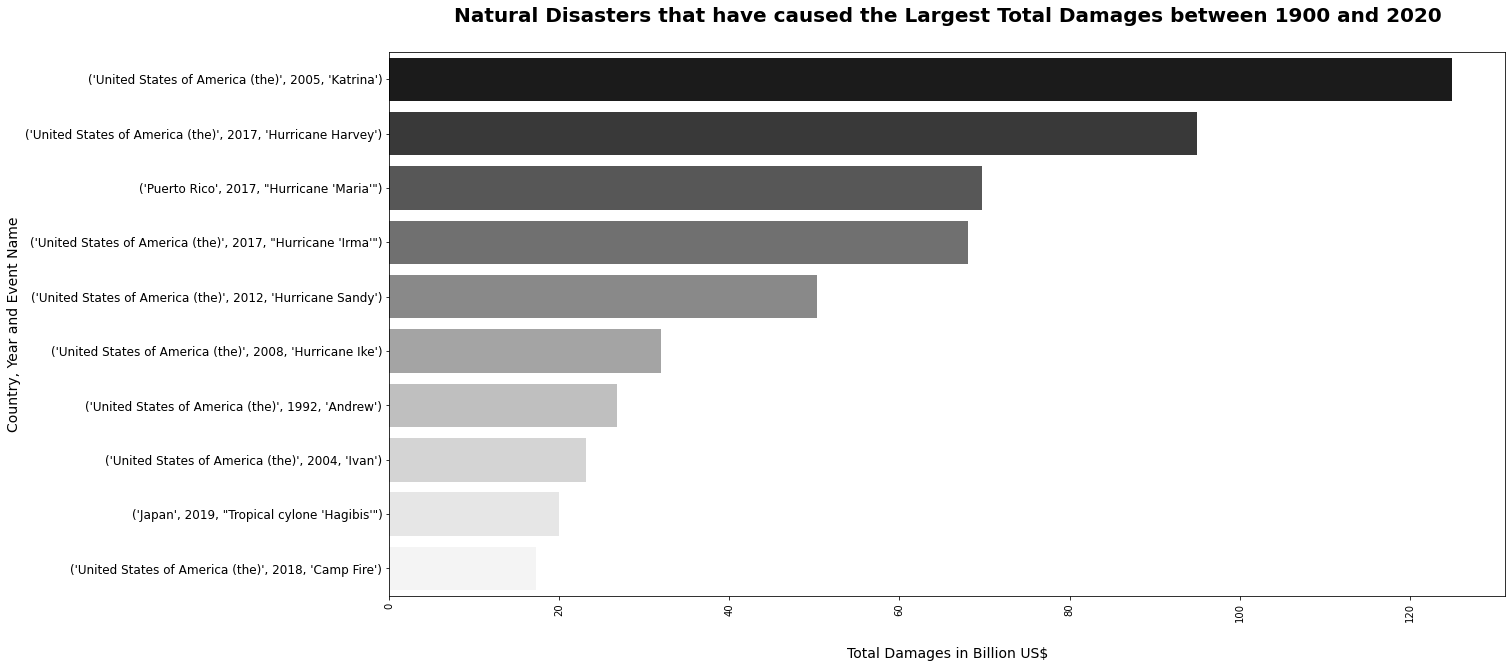

In [153]:
# Looking for the natural disasters with the highest total damages 

fig, ax = plt.subplots(figsize=(20,10))

data = disasters_df[["Total Damages (\'000 US$)",
              "Year", "Region", "Country",
              "Continent", "Event Name"]].groupby("Event Name").sum().sort_values(
    by="Total Damages (\'000 US$)",
    ascending=False
).iloc[:10] / 1000000

data_plot = disasters_df[["Total Damages (\'000 US$)",
              "Year", "Region", "Country",
              "Continent", "Event Name"]].groupby(["Country", "Year", "Event Name"]).sum().sort_values(
    by="Total Damages (\'000 US$)",
    ascending=False
).iloc[:10]



# Get a blue palette for the bars
pal = sns.color_palette("Greys_r", len(data))
rank = data["Total Damages (\'000 US$)"].argsort().argsort()

# Plot the data
g = sns.barplot(y=data.index, x=data["Total Damages (\'000 US$)"],
                ax=ax, color="#00A0FF", palette=np.array(pal[::-1])[rank])

# Other plot formatting settings
plt.xticks(rotation=90)
ax.set_yticklabels(data_plot.index,
                   fontdict={
                       "size": 12
                   });

plt.title('Natural Disasters that have caused the Largest Total Damages between 1900 and 2020',
          fontdict=dict(
              size=20,
              weight="bold"
          ),
          pad=30)
plt.ylabel("Country, Year and Event Name",
           fontdict=dict(
               size=14
           ))
plt.xlabel("Total Damages in Billion US$",
           fontdict=dict(
               size=14
           ),
           labelpad=25
          );

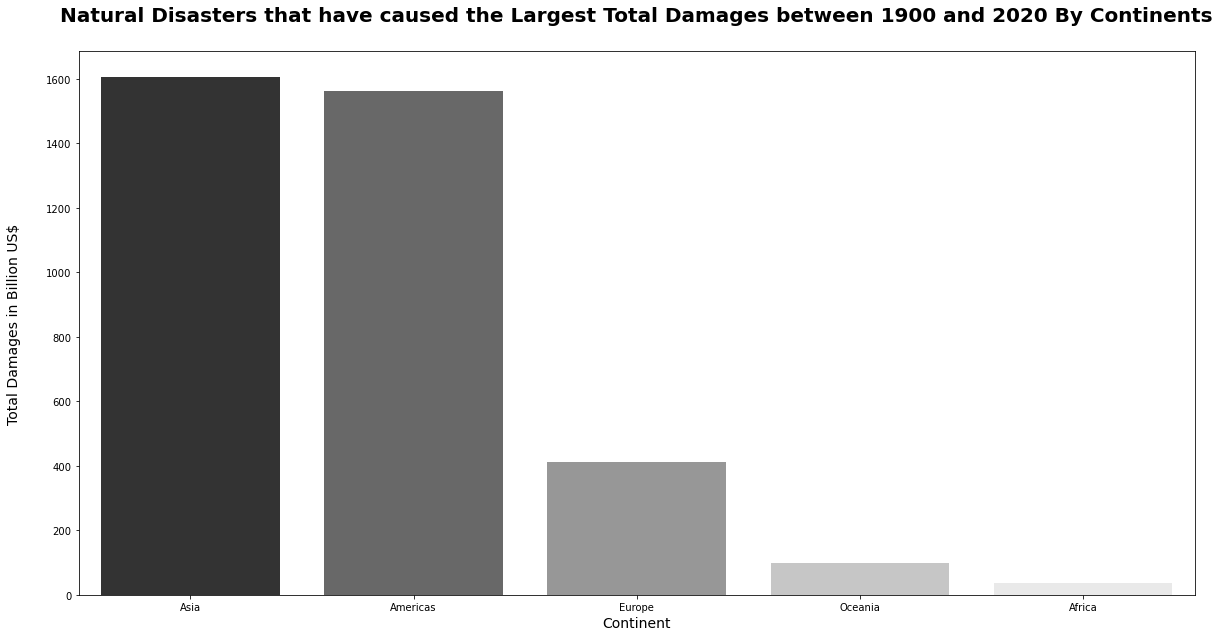

In [155]:
# Looking for the natural disasters with the highest total damages 

fig, ax = plt.subplots(figsize=(20,10))

data = disasters_df[["Total Damages (\'000 US$)",
              "Year", "Region", "Country",
              "Continent", "Event Name"]].groupby("Continent").sum().sort_values(
    by="Total Damages (\'000 US$)",
    ascending=False
) / 1000000


# Get a blue palette for the bars
pal = sns.color_palette("Greys_r", len(data))
rank = data["Total Damages (\'000 US$)"].argsort().argsort()

# Plot the data
g = sns.barplot(x=data.index, y=data["Total Damages (\'000 US$)"],
                ax=ax, color="#00A0FF", palette=np.array(pal[::-1])[rank])

# Other plot formatting settings
plt.title('Natural Disasters that have caused the Largest Total Damages between 1900 and 2020 By Continents',
          fontdict=dict(
              size=20,
              weight="bold"
          ),
          pad=30)
plt.xlabel("Continent",
           fontdict=dict(
               size=14
           ))
plt.ylabel("Total Damages in Billion US$",
           fontdict=dict(
               size=14
           ),
           labelpad=25
          );

In [156]:
disasters_df[["Total Damages (\'000 US$)", "Year"]].groupby("Year").sum()

,Total Damages ('000 US$)
Year,
1900,30000.0
1901,0.0
1902,25000.0
1903,480000.0
1904,0.0
...,...
2017,326082769.0
2018,133592166.0
2019,100940456.0


In [157]:
fig = px.line(disasters_df[["Total Damages (\'000 US$)", "Year"]].groupby("Year").sum()/1000000,
              color_discrete_sequence=["#940069"])


fig.update_yaxes(
    title=dict(
        text="Sum of Total Damages (Billion US$')",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_xaxes(
    title_font_family="Arial",
    title=dict(
        text="Year",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_layout(
    title=dict(
        text="Yearly Total Damages from 1900 to 2021",
        font=dict(
            family="Arial",
            size=24
        )
    ),
    hovermode="x unified"
)

fig.show()

In [158]:
count = disasters_df[["Total Damages (\'000 US$)", "Year"]].groupby("Year").count()
sum_damages = data_frame=disasters_df[["Total Damages (\'000 US$)", "Year"]].groupby("Year").sum()

fig = px.line(disasters_df[["Total Damages (\'000 US$)", "Year"]].groupby("Year").count(),
              color_discrete_sequence=["#940069"])


fig.update_yaxes(
    title=dict(
        text="Sum of Total Damages (Billion US$')",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_xaxes(
    title_font_family="Arial",
    title=dict(
        text="Year",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_layout(
    title=dict(
        text="Yearly Total Damages from 1900 to 2021",
        font=dict(
            family="Arial",
            size=24
        )
    ),
    hovermode="x unified"
)

fig.show()

Obserse the rise in spending in the recent years is very high.

In [161]:
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15866 entries, 0 to 15865
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           15866 non-null  object 
 1   Year                             15866 non-null  int64  
 2   Seq                              15866 non-null  int64  
 3   Disaster Group                   15866 non-null  object 
 4   Disaster Subgroup                15866 non-null  object 
 5   Disaster Type                    15866 non-null  object 
 6   Disaster Subtype                 12862 non-null  object 
 7   Disaster Subsubtype              1047 non-null   object 
 8   Event Name                       3806 non-null   object 
 9   Entry Criteria                   15531 non-null  object 
 10  Country                          15866 non-null  object 
 11  ISO                              15866 non-null  object 
 12  Region            

#### Processing Natural Disasters Data
Create a duration column and remove a total of 6 columns.

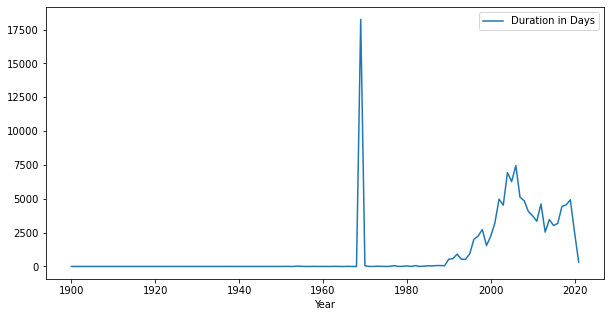

In [168]:
disasters_df["Duration in Days"] = (disasters_df["End Day"] - disasters_df["Start Day"]) + \
                                    30 * (disasters_df["End Month"] - disasters_df["Start Month"]) + \
                                    365 * (disasters_df["End Year"] - disasters_df["Start Year"])

disasters_df[["Duration in Days", "Year"]].groupby("Year").sum().plot(figsize=(10,5));

In [169]:
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15866 entries, 0 to 15865
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           15866 non-null  object 
 1   Year                             15866 non-null  int64  
 2   Seq                              15866 non-null  int64  
 3   Disaster Group                   15866 non-null  object 
 4   Disaster Subgroup                15866 non-null  object 
 5   Disaster Type                    15866 non-null  object 
 6   Disaster Subtype                 12862 non-null  object 
 7   Disaster Subsubtype              1047 non-null   object 
 8   Event Name                       3806 non-null   object 
 9   Entry Criteria                   15531 non-null  object 
 10  Country                          15866 non-null  object 
 11  ISO                              15866 non-null  object 
 12  Region            

In [177]:
drop_cols = ["Start Year", "Start Month", "Start Day",
             "End Year", "End Month", "End Day",
             "Dis No", "Seq", "Associated Dis", "Associated Dis2",
             "OFDA Response", "Appeal", "Declaration",
             "Dis Mag Value", "Dis Mag Scale", "Latitude", "Longitude",
             "Local Time", "Reconstruction Costs ('000 US$)", "Insured Damages ('000 US$)"]

disasters_df.drop(drop_cols, axis=1).to_csv(
    os.path.join(process_evidence_data_dir, "Natural Disasters.csv"),
    index=False
)

#### Visualizing CO2 Concentration levels

In [159]:
# Create a copy of the dataframe
co2_conc = dataset_dfs["CO2 concentrations"].copy()
co2_conc

,Figure 1. Global Atmospheric Concentrations of Carbon Dioxide Over Time,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Source: EPA's Climate Change Indicators in the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data source: Compilation of 10 underlying data...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Web update: April 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Units: parts per million (ppm) of CO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1362,2011,NaN,NaN,NaN,391.63,393.1108333,389.58,387.9875,NaN,NaN,NaN
1363,2012,NaN,NaN,NaN,393.82,394.94,391.5666667,390.0608333,NaN,NaN,NaN
1364,2013,NaN,NaN,NaN,396.48,397.9566667,394.32,392.8066667,NaN,NaN,NaN
1365,2014,NaN,NaN,NaN,398.61,399.8516667,396.1375,394.8225,NaN,NaN,NaN


#### Visualizing the Forces for Rise in Global Temperatures

In [181]:
# Create a copy of the dataframe
forces = dataset_dfs["Global Temp Forces"].copy()
forces

,date,year,month,total,anthro,nat,co2,wmghg,aero,o3Tr,o3St,luc,solar,volc
0,1750.00,1750,1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
1,1750.08,1750,2,-0.002500,-0.00170,-0.000800,-0.001700,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000800,0.00000
2,1750.17,1750,3,-0.005000,-0.00330,-0.001700,-0.003300,0.000000,0.000000,0.000000,0.00000,0.000000,-0.001700,0.00000
3,1750.25,1750,4,-0.007500,-0.00500,-0.002500,-0.005000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.002500,0.00000
4,1750.33,1750,5,-0.010000,-0.00660,-0.003300,-0.006600,0.000000,0.000000,0.000000,0.00000,0.000000,-0.003300,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,2499.67,2499,9,6.184506,6.32236,-0.130921,5.337446,1.143039,-0.385485,0.290597,-0.02013,-0.145704,0.052729,-0.18365
8997,2499.75,2499,10,6.184506,6.32236,-0.130921,5.337446,1.143039,-0.385485,0.290597,-0.02013,-0.145704,0.052729,-0.18365
8998,2499.83,2499,11,6.184506,6.32236,-0.130921,5.337446,1.143039,-0.385485,0.290597,-0.02013,-0.145704,0.052729,-0.18365
8999,2499.92,2499,12,6.184506,6.32236,-0.130921,5.337446,1.143039,-0.385485,0.290597,-0.02013,-0.145704,0.052729,-0.18365


In [182]:
meaning_dict = {
    "anthro": "Human Force",
    "nat": "Natural Force",
    "co2": "Carbon Dioxide Force",
    "wmghg": "Greenhouse Gases",
    "aero": "Aerosols in the Air",
    "o3Tr": "Ozone Layer Tr",
    "o3St": "Ozone Layer Stratosphere",
    "luc": "luc",
    "solar": "Solar Force",
    "volc": "Volcanos Force",
    "total": "Total Effect"
}

forces2 = forces.drop(meaning_dict.keys(), axis=1)

for key, value in meaning_dict.items():
    forces2[value] = forces[key]
    
forces2.head()

,date,year,month,Human Force,Natural Force,Carbon Dioxide Force,Greenhouse Gases,Aerosols in the Air,Ozone Layer Tr,Ozone Layer Stratosphere,luc,Solar Force,Volcanos Force,Total Effect
0,1750.00,1750,1,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000
1,1750.08,1750,2,-0.0017,-0.0008,-0.0017,0.0,0.0,0.0,0.0,0.0,-0.0008,0.0,-0.0025
2,1750.17,1750,3,-0.0033,-0.0017,-0.0033,0.0,0.0,0.0,0.0,0.0,-0.0017,0.0,-0.0050
3,1750.25,1750,4,-0.0050,-0.0025,-0.0050,0.0,0.0,0.0,0.0,0.0,-0.0025,0.0,-0.0075
4,1750.33,1750,5,-0.0066,-0.0033,-0.0066,0.0,0.0,0.0,0.0,0.0,-0.0033,0.0,-0.0100


In [183]:

fig = px.line(forces2.drop(["date", "month"],axis=1).groupby("year").mean().iloc[:-480],
              height=750, width=1500)


fig.update_yaxes(
    title=dict(
        text="Sum of Total Damages (Billion US$')",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_xaxes(
    title_font_family="Arial",
    title=dict(
        text="Year",
        font=dict(
            size=16,
            family="Arial"
        )
    )
)

fig.update_layout(
    title=dict(
        text="Yearly Total Damages from 1750 to 2019",
        font=dict(
            family="Arial",
            size=24
        )
    ),
    hovermode="x unified"
)

fig.show()

#### Processing Forces Data
As the names are difficult to understand, the data can be saved with better names to ease visualization in PowerBI.

In [184]:
forces2.head()

,date,year,month,Human Force,Natural Force,Carbon Dioxide Force,Greenhouse Gases,Aerosols in the Air,Ozone Layer Tr,Ozone Layer Stratosphere,luc,Solar Force,Volcanos Force,Total Effect
0,1750.00,1750,1,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000
1,1750.08,1750,2,-0.0017,-0.0008,-0.0017,0.0,0.0,0.0,0.0,0.0,-0.0008,0.0,-0.0025
2,1750.17,1750,3,-0.0033,-0.0017,-0.0033,0.0,0.0,0.0,0.0,0.0,-0.0017,0.0,-0.0050
3,1750.25,1750,4,-0.0050,-0.0025,-0.0050,0.0,0.0,0.0,0.0,0.0,-0.0025,0.0,-0.0075
4,1750.33,1750,5,-0.0066,-0.0033,-0.0066,0.0,0.0,0.0,0.0,0.0,-0.0033,0.0,-0.0100


In [185]:
forces2.to_csv(
    os.path.join(process_evidence_data_dir, "Forces Dataset.csv"),
    index=False
)

## Who is responsible for the CO2 emissions?

## How can we reduce CO2 emissions?